In [1]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter
from tqdm.notebook import tqdm
from math import log
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors

In [2]:
N = 10000
k = 4
beta = 0.01
T = 1000

In [13]:
def dim(infected, beta, k, P):
    return beta * k * (1-sum(infected)) * (P.T@infected)

In [12]:
err = 0.04
Q = np.array([[1 - err, err],[err, 1-err]])

In [20]:
I = [np.array([2/N, 0])]


for t in range(1,T):
    I.append(I[t-1] + dim(infected=I[t-1], beta=beta, k=k, P=Q))

In [21]:
I2 = [np.array([1/N, 1/N])]


for t in range(1,T):
    I2.append(I2[t-1] + dim(infected=I2[t-1], beta=beta, k=k, P=Q))

In [26]:
I3 = [np.array([0, 2/N])]


for t in range(1,T):
    I3.append(I3[t-1] + dim(infected=I3[t-1], beta=beta, k=k, P=Q))

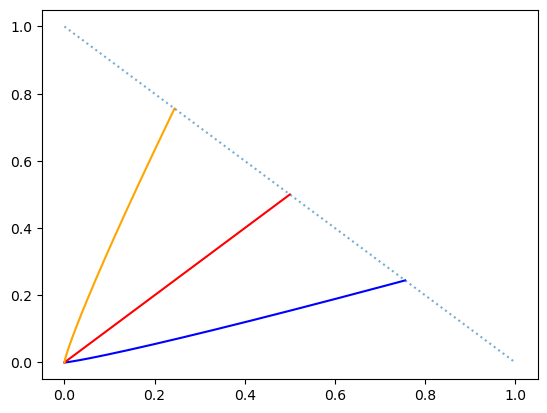

In [27]:
plt.plot([i[0] for i in I],[i[1] for i in I], 'blue')
plt.plot([i[0] for i in I2],[i[1] for i in I2], 'red')
plt.plot([i[0] for i in I3],[i[1] for i in I3], 'orange')


plt.plot([x for x in np.linspace(0, 1, 1000)], [1-x for x in np.linspace(0,1,1000)], linestyle='dotted', 
        alpha=0.6)

# Stochastic Simulation

In [1]:
!pip install -e /home/sagar/modeling-info-spread

Obtaining file:///home/sagar/modeling-info-spread
  Preparing metadata (setup.py) ... done
  Attempting uninstall: src
    Found existing installation: src 0.2.8
    Uninstalling src-0.2.8:
      Successfully uninstalled src-0.2.8
  Running setup.py develop for src


In [2]:
import os
import matplotlib.pyplot as plt
from matplotlib import colormaps
from src.models.NSI import NSI
from src.models.channel import *
from tqdm.notebook import tqdm
import pickle
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from scipy import stats
from collections import defaultdict, Counter
import numpy as np
from sklearn.metrics import mean_squared_error
from itertools import chain

In [3]:
errors = [0.1, 0.4, 0.5, 0.6, 0.8, 1]

In [5]:
N = 10000
k = 4
beta = 0.01
T = 1000

In [6]:
binary_channels = {

    'sym': [single_flip_channel(1, err) for err in errors],

    'asym': [bin_asym_channel(err, ((err-0.5) % 1)) for err in errors]

}

binary_models = {

    

    'sym': [NSI(N=N, T=T, P=c) for c in binary_channels['sym']],

    'asym': [NSI(N=N, T=T, P=c) for c in binary_channels['asym']]

    

}

binary_homo_outputs = {

    'sym': [m.homogeneous_analytic(beta, k) for m in binary_models['sym']],

    'asym': [m.homogeneous_analytic(beta, k) for m in binary_models['asym']]

}

bin_homo_simulations = {
    
    'sym': [[m.homogeneous_simulations(beta, k, notebook=True) for m in binary_models['sym']] for _ in range(4)],
    'asym': [[m.homogeneous_simulations(beta, k, notebook=True) for m in binary_models['asym']] for _ in range(4)]
    
}

  0%|          | 0/999 [00:00<?, ?it/s]

KeyError: 3147